# Carregar as bibliotecas

In [1]:
import numpy as np
from skimage import io, data, filters, util, color, transform, exposure, measure
from skimage.util import img_as_float, img_as_uint, img_as_ubyte
import matplotlib.pyplot as plt
from sklearn import preprocessing, metrics, svm
from sklearn.model_selection import train_test_split
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
# blblioteca para arquivos zipados
import zipfile
# biblioteca para manipulaçao de arquivos
import os

### Download do arquivo numbers.zip

In [3]:
!gdown 1g7sA9bPWYOKRcTew88EDV_mdxR0j1rl4

Downloading...
From: https://drive.google.com/uc?id=1g7sA9bPWYOKRcTew88EDV_mdxR0j1rl4
To: /content/numbers.zip
100% 15.1k/15.1k [00:00<00:00, 38.7MB/s]


### Descomprimir arquivo zip

In [4]:
local_zip = 'numbers.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp')
zip_ref.close()

In [5]:
m_path = 'tmp/numbers'
img_files = os.listdir(m_path)
print(img_files)

['num3.jpg', 'num2.jpg', 'num9.jpg', 'num4.jpg', 'num1.jpg', 'num7.jpg', 'num6.jpg', 'num5.jpg', 'num0.jpg', 'num8.jpg']


### Ordena alfabeticamente os nomes dos arquivos

In [6]:
img_files.sort()
print(img_files)

['num0.jpg', 'num1.jpg', 'num2.jpg', 'num3.jpg', 'num4.jpg', 'num5.jpg', 'num6.jpg', 'num7.jpg', 'num8.jpg', 'num9.jpg']


# Questão 1

<p align="justify">O reconhecimento de padrões é o estudo de como as máquinas observam seu entorno, aprendem a distinguir padrões de interesse e tomam decisões razoáveis sobre as categorias dos padrões Um padrão é uma descrição de um objeto. Um computador consegue reconhecer padrões, convertendo-os em sinais digitais e comparando-os com outros sinais já armazenados na memória.  </p>

<p align="justify">
Um sistema de reconhecimento geralmente compreende três componentes principais: pré-processamento, extração de características e classificação. Na etapa de pré-processamento, os dados de entrada são manipulados por uma variedade de métodos que fazem operações, tais como remoção de ruído, segmentação e melhoramento da qualidade dos mesmos. Na extração de características, o objetivo é representar os dados de entrada em termos de medidas quantificáveis que possam ser utilizados facilmente na etapa de classificação. O problema do reconhecimento de padrões é reconhecer padrões que sejam, em algum
sentido, "os mesmos" apesar de ter experimentado uma variedade de transformações permitidas. Os padrões na vida real apresentam transformações geométricas lineares (rotação, escala e translação), deformações não lineares e variância de iluminação e <i>background</i>, etc. Este tipo de reconhecimento pode ser uma tarefa simples para os seres humanos e para os animais, mas converte-se em um grande problema se tentamos realizá-lo através de um computador. Os métodos tradicionais de reconhecimento de padrões carecem da habilidade para reconhecer o mesmo padrão com certo tipo de variância.</p>

<p align="justify">
Execute os seguintes pasos para cada imagem da base de dados:
</p>

<ol>
    <li>Para cada inagem fornecida, gere 20 imagens com diferentes rotações</li>
    <li>Cada imagem rotacionado deve ser redimensionada em seis diferentes escalas: 0.5, 0.75, 1, 1.25, 1.5, 2</li>
    <li>Inserir ruído tipo sal e pimenta en cada imagem redimensionada. Use os seguintes valores de rúido: 0, 0.01, 0.02, 0.03</li>
    <li>Extrair os momentos de Hu de cada imagem e salvar o descritor em uma matriz e a etiqueta a qual pertence em um vetor.</li>

</ol>







In [7]:
def Hu_moments(img):
  momentos_centrais = measure.moments_central(img)
  momentos_normalizados = measure.moments_normalized(momentos_centrais)
  momentos_hu = measure.moments_hu(momentos_normalizados)
  return momentos_hu

<p align="justify">  Função <i>feature_extraction()</i> extrai as características de todas as imagens e salva em uma matriz os vetores de caractarísticas. Não é necessário salvar as imagens, crie a imagem e logo faça a extração de características. </p>

In [9]:
def feature_extraction(m_path, img_files):
  # pré processamento , extração de características e classificação
  # informações sobre os ângulos, tamanhos e porcentagem de ruído
  angs = np.linspace(0,180,20) # 20 angulos
  tams = [0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]
  ruidos = [0, 0.01, 0.02, 0.03, 0.04]
  # rotaçao escala e ruido... depois humom (um vetor para cada uma das imagens) colocar dentro de uma matriz 0 o graus com tamanho 0.5 ... um descritor para cada versão da imagem para todos os digitos 9... gerar a matriz de caracteristicas de cada imagem... cada vetor de caracteristica tenha a mesma etiqueta para passar p/ classificador (etiquetagem entre 0 e 9)... depois dividir em teste e conjunto de treino... depois passar p/ classificador e depois
  # Calcula o número total de imagens que serão geradas
  N = len(img_files) * len(angs) * len(tams) * len(ruidos)

  # matriz que deve conter os vetores de características
  hu_X = np.zeros( (N,7) )

  # etiquetas de cada um dos vetores de características
  hu_Y = np.zeros( (N) )

  # índice usado para salvar los vetores dentro da matriz
  pos = 0

  for l, file in enumerate(img_files):
      # l será usado como etiqueta e file é o nome do arquivo
      img = io.imread(os.path.join(m_path, file), as_gray = True)
      print(file)
      # 3 for um para rotação, um para escala e outro para ruido
      for ang in angs:
        rotacionada = transform.rotate(img,ang)
        for tam in tams:
          escala = transform.rescale(rotacionada, tam)
          for ruido in ruidos:
            noisy = util.random_noise(escala, amount=ruido, mode='s&p')
            hu_X[pos,:] = Hu_moments(noisy)
            hu_Y[pos] = l
            pos = pos + 1

  return hu_X, hu_Y


In [10]:
hu_X, hu_Y = feature_extraction(m_path='tmp/numbers', img_files = img_files)

num0.jpg
num1.jpg
num2.jpg
num3.jpg
num4.jpg
num5.jpg
num6.jpg
num7.jpg
num8.jpg
num9.jpg


### 5. Normalizar os dados

<p>O objetivo da normalização é alterar os valores das colunas numéricas no conjunto de dados para uma escala comum, sem distorcer as diferenças nos intervalos de valores.</p>

* Normalização
$$X_{new} = \frac{ X - X_{min} }{ X_{max} - X_{min} }$$

<p>
class <b>sklearn.preprocessing.MinMaxScaler</b>(feature_range=(0, 1),  copy=True, clip=False)
<ul>
    <li>feature_range: tuple (min, max), default=(0, 1). Desired range of transformed data.</li>
    <li>copy: bool, default=True. Set to False to perform inplace row normalization and avoid a copy (if the input is already a numpy array).</li>
    <li>clip: bool, default=False. Set to True to clip transformed values of held-out data to provided feature range.</li>
</ul>
</p>

* Padronização
<p>
$$X_{changed} = \frac{ X - \mu }{ \sigma } $$
Importando o módulo de preprocessamento</p>

<p>
class <b>sklearn.preprocessing.StandardScaler</b>(copy=True, with_mean=True, with_std=True
<ul>
    <licopy: bool: default=True. If False, try to avoid a copy and do inplace scaling instead. This is not guaranteed to always work inplace; e.g. if the data is not a NumPy array or scipy.sparse CSR matrix, a copy may still be returned.</li>
    <li>with_mean: bool, default=True. If True, center the data before scaling. This does not work (and will raise an exception) when attempted on sparse matrices, because centering them entails building a dense matrix which in common use cases is likely to be too large to fit in memory.</li>
    <li>with_std: bool, default=True. If True, scale the data to unit variance (or equivalently, unit standard deviation).</li>
</ul>
</p>

In [12]:
# normalização

minmax_scaler = preprocessing.MinMaxScaler().fit(hu_X)
hu_Xn = minmax_scaler.transform(hu_X)
# padronização
std_scaler = preprocessing.StandardScaler().fit(hu_X)
hu_Xp = std_scaler.transform(hu_X)

### 6. Dividir o conjunto de dados en treino e teste
<p>
<b>sklearn.model_selection.train_test_split</b>(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
<ul>
    <li>*arrays: sequence of indexables with same length / shape[0]. Allowed inputs are lists, numpy arrays, scipy-sparse matrices or pandas dataframes.</li>
    <li>test_size: float or int, default=None. If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. If int, represents the absolute number of test samples. If None, the value is set to the complement of the train size. If train_size is also None, it will be set to 0.25.</li>
    <li>train_size: float or int, default=None. If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the train split. If int, represents the absolute number of train samples. If None, the value is automatically set to the complement of the test size.</li>
    <li>random_state: int, RandomState instance or None, default=None. Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls. See Glossary.</li>
    <li>shuffle: bool, default=True. Whether or not to shuffle the data before splitting. If shuffle=False then stratify must be None.</li>
    <li>stratify: array-like, default=None. If not None, data is split in a stratified fashion, using this as the class labels.</li>
</ul>
Returns
<ul>
    <li>splitting: list, length=2 * len(arrays). List containing train-test split of inputs.</li>
</ul>
</p>














In [13]:
x_train, x_test, y_train, y_test = train_test_split(hu_Xn, hu_Y, test_size = 0.25)

### 7. Instanciar o modelo SVM e treinar

<p>
<b>class sklearn.svm.SVCt</b>(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
<ul>
    <li>C: float, default=1.0. Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.</li>
    <li>kernel: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’. Specifies the kernel type to be used in the algorithm. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).</li>
    <li>degree: int, default=3. Degree of the polynomial kernel function (‘poly’). Must be non-negative. Ignored by all other kernels.</li>
    <li>gamma: {‘scale’, ‘auto’} or float, default=’scale’. Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.</li>
    <li>coef0: float, default=0.0. Independent term in kernel function. It is only significant in ‘poly’ and ‘sigmoid’.</li>
    <li>shrinkingbool, default=True. Whether to use the shrinking heuristic.</li>
    <li>probabilitybool, default=False. Whether to enable probability estimates. This must be enabled prior to calling fit, will slow down that method as it internally uses 5-fold cross-validation, and predict_proba may be inconsistent with predict.</li>
    <li>tol: float, default=1e-3. Tolerance for stopping criterion.</li>
    <li>cache_size: float, default=200. Specify the size of the kernel cache (in MB).</li>
    <li>class_weight: dict or ‘balanced’, default=None. Set the parameter C of class i to class_weight[i]*C for SVC. If not given, all classes are supposed to have weight one. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).</li>
    <li>verbose: bool, default=False. Enable verbose output. Note that this setting takes advantage of a per-process runtime setting in libsvm that, if enabled, may not work properly in a multithreaded context.</li>
    <li>max_iterint, default=-1. Hard limit on iterations within solver, or -1 for no limit.</li>
    <li>random_state: int, RandomState instance or None, default=None. Controls the pseudo random number generation for shuffling the data for probability estimates. Ignored when probability is False. Pass an int for reproducible output across multiple function calls.</li>
</ul>
</p>

## Métodos
<p>
<ul>
  <li><b>fit</b>: The fit method is provided on every estimator. It usually takes some samples X, targets y if the model is supervised, and potentially other sample properties such as sample_weight. It should:</li>
    <ul>
    <li>clear any prior attributes stored on the estimator, unless warm_start is used;</li>
    <li>validate and interpret any parameters, ideally raising an error if invalid;</li>
    <li>validate the input data;</li>
    <li>estimate and store model attributes from the estimated parameters and provided data; and</li>
    <li>return the now fitted estimator to facilitate method chaining.</li>
    </ul>
  <li>predict: Makes a prediction for each sample, usually only taking X as input (but see under regressor output conventions below). In a classifier or regressor, this prediction is in the same target space used in fitting (e.g. one of {‘red’, ‘amber’, ‘green’} if the y in fitting consisted of these strings). Despite this, even when y passed to fit is a list or other array-like, the output of predict should always be an array or sparse matrix. In a clusterer or outlier detector the prediction is an integer.

If the estimator was not already fitted, calling this method should raise a exceptions.NotFittedError.

Output conventions:
    <ul>
    <li>classifier: An array of shape (n_samples,) (n_samples, n_outputs). Multilabel data may be represented as a sparse matrix if a sparse matrix was used in fitting. Each element should be one of the values in the classifier’s classes_ attribute.</li>
    <li>clusterer: An array of shape (n_samples,) where each value is from 0 to n_clusters - 1 if the corresponding sample is clustered, and -1 if the sample is not clustered, as in cluster.dbscan.</li>
    <li>outlier detector: An array of shape (n_samples,) where each value is -1 for an outlier and 1 otherwise.</li>
    <li>regressor: A numeric array of shape (n_samples,), usually float64. Some regressors have extra options in their predict method, allowing them to return standard deviation (return_std=True) or covariance (return_cov=True) relative to the predicted value. In this case, the return value is a tuple of arrays corresponding to (prediction mean, std, cov) as required.</li>
    </ul>
</ul>
</p>
























In [14]:
clf_svm = svm.SVC()
clf_svm.fit(x_train, y_train)
pred = clf_svm.predict(x_test)

## 8. Calcular a matriz de confusão
<p>
<b>sklearn.metrics.confusion_matrix</b>(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None): Compute confusion matrix to evaluate the accuracy of a classification.
<ul>
  <li>y_true: array-like of shape (n_samples,) Ground truth (correct) target values.</li>
  <li>y_pred: array-like of shape (n_samples,) Estimated targets as returned by a classifier.</li>
  <li>labels: array-like of shape (n_classes), default=None. List of labels to index the matrix. This may be used to reorder or select a subset of labels. If None is given, those that appear at least once in y_true or y_pred are used in sorted order.</li>
  <li>sample_weight: array-like of shape (n_samples,), default=None. Sample weights.</li>
  <li>normalize{‘true’, ‘pred’, ‘all’}, default=None. Normalizes confusion matrix over the true (rows), predicted (columns) conditions or all the population. If None, confusion matrix will not be normalized.</li>
</ul>
</p>




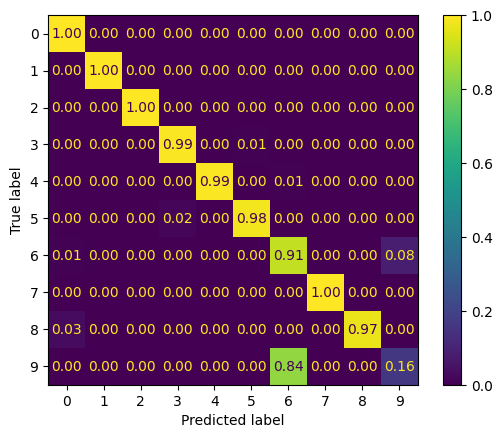

In [15]:
matriz = metrics.confusion_matrix(y_test, pred)
tot = np.sum(matriz, axis=1, keepdims=True)
np.set_printoptions(precision=2)
m_porc = matriz/tot
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=m_porc, display_labels=[0,1,2,3,4,5,6,7,8,9])
disp.plot(values_format='.2f')
plt.show()

# Questão 2

<p>Avaliar o modelo treinado reconhecendo os números na seguinte imagem:</p>

<img src="https://drive.google.com/uc?id=1iewo9yp9i_S-AXAvkdJA0LzUeKZNJGi7" alt="Drawing"  width="700"/> </td>

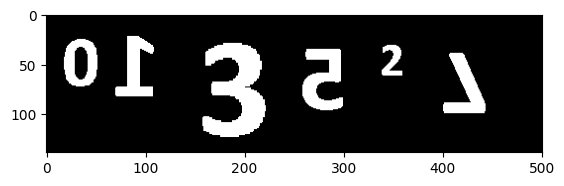

In [16]:
img = io.imread('https://drive.google.com/uc?id=1iewo9yp9i_S-AXAvkdJA0LzUeKZNJGi7', as_gray=True)
img = img > 0.5
plt.imshow(img, cmap='gray')

<p align="justify">O seguinte código gera os <i>bounding box</i> ao redor de cada número</p>

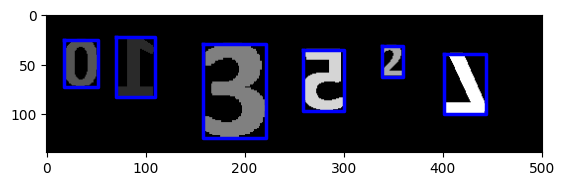

In [17]:
img_label = measure.label(img)
regions = measure.regionprops(img_label)
fig, ax = plt.subplots()
ax.imshow(img_label, cmap=plt.cm.gray)
for props in regions:
    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=2.5)

### Reconheça da um dos caracteres usando o modelo treinado

[1.]
[0.]
[3.]
[2.]
[5.]
[7.]


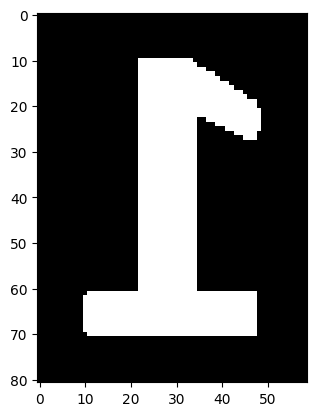

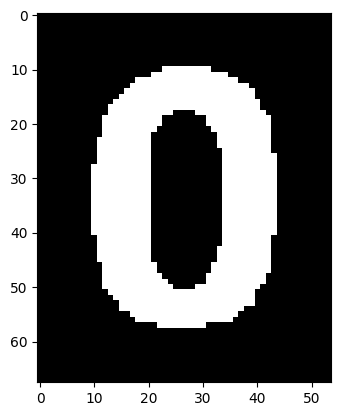

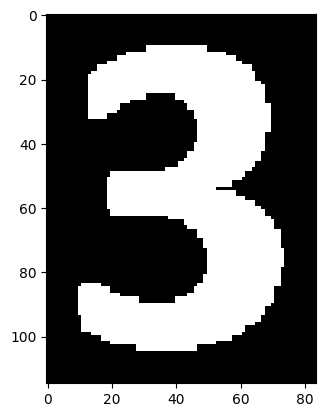

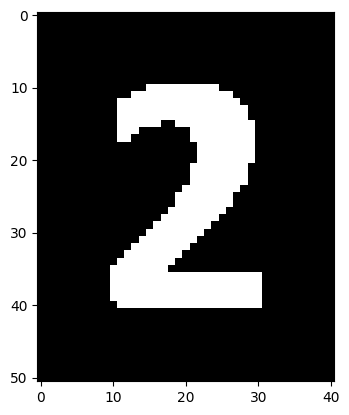

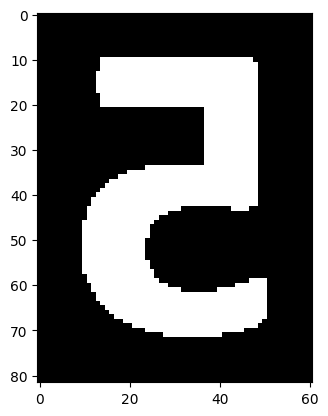

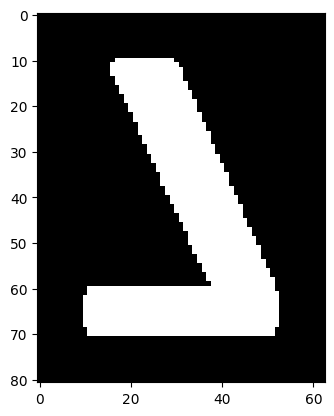

In [19]:
for props in regions:
    minr, minc, maxr, maxc = props.bbox
    delta = 10
    minr -= delta
    minc -= delta
    maxr += delta
    maxc += delta
    patch = img[minr:maxr, minc:maxc]
    plt.figure()
    plt.imshow(patch, cmap='gray')

    humom = Hu_moments(patch)
    hu_Xp = minmax_scaler.transform([humom])
    pred = clf_svm.predict(hu_Xp)
    print(pred)